In [7]:
import pandas as pd
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import decomposition
import heapq
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#%%Estimate Average Cluster Size, #MinPts Cluster, #Epsilon Threshold
#These parameters really depend on reference singal data and should be known by user 

Epsilon_Threshold_Ang = .985
Epsilon_Threshold_Amp = 1.50 #Adjust Size of Epsilon
MinPts = 100
Extrapolate_Data = False
Total_Points = 100
#Turn on the plotting of Angle_Cluster Recommended set to False unless debugging
Plot_Each_Angle_Cluster = True

np.set_printoptions(threshold=np.nan)
plt.close("all")


In [9]:
#%%Loading Data
df_Amp_Ref = pd.read_csv('Training_Data_Amp.csv',index_col=0,low_memory=False)
df_Ang_Ref = pd.read_csv('Training_Data_Ang.csv',index_col=0,low_memory=False)
df_Amp_New = pd.read_csv('New_Data_Amp.csv',index_col=0,low_memory=False)
df_Ang_New = pd.read_csv('New_Data_Ang.csv',index_col=0,low_memory=False)

#data_test_spectral_Amp_day_12
#Comparison_DATA_2day_Amp.csv
#ESSB276_AirFlow_Amp.csv
#Test_Set_1_Amp

names = np.array(df_Amp_Ref.columns.values)[1:]
names_new = np.array(df_Amp_New.columns.values)[1:]
#Reference Data
data_Amp_Ref = np.array(df_Amp_Ref) 
data_Amp_Used_Ref = data_Amp_Ref[3:,1:].astype(np.float)
data_Amp_trans_Ref = np.transpose(data_Amp_Used_Ref)
data_Ang_Ref = np.array(df_Ang_Ref) 
data_Ang_Used_Ref = data_Ang_Ref[3:,1:].astype(np.float)
data_Ang_trans_Ref = np.transpose(data_Ang_Used_Ref)
period =  data_Amp_Ref[3:,0]
#New Data
data_Amp_New = np.array(df_Amp_New) 
data_Amp_Used_New = data_Amp_New[3:,1:].astype(np.float)
data_Amp_trans_New = np.transpose(data_Amp_Used_New)
data_Ang_New = np.array(df_Ang_New) 
data_Ang_Used_New = data_Ang_New[3:,1:].astype(np.float)
data_Ang_trans_New = np.transpose(data_Ang_Used_New)


576
576


In [10]:
#Map Points
Point_Map_Amp_Ref=dict(zip(names,data_Amp_trans_Ref))
Point_Map_Amp_New=dict(zip(names_new,data_Ang_trans_New))
Point_Map_Ang_Ref=dict(zip(names,data_Amp_trans_Ref))
Point_Map_Ang_New=dict(zip(names_new,data_Ang_trans_New))


576
(502, 2)


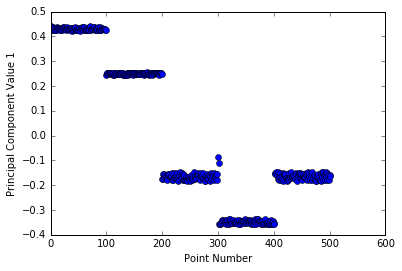

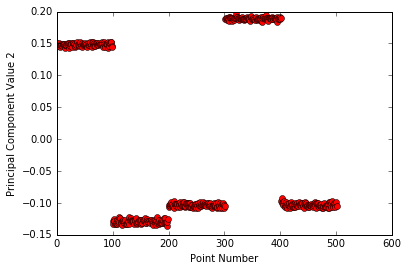

In [29]:
#Data for Plotting
%matplotlib inline
print data_Amp_trans_Ref.shape[1]
pca = decomposition.PCA(n_components = 2)
pca.fit(data_Amp_trans_Ref)
Plot_Data_Amp_ref = pca.transform(data_Amp_trans_Ref)
pca.fit(data_Ang_trans_Ref)
Plot_Data_Ang_ref = pca.transform(data_Ang_trans_Ref)
print Plot_Data_Amp_ref.shape
pca = decomposition.PCA(n_components=2)
pca.fit(data_Amp_trans_New)
Plot_Data_Amp_New = pca.transform(data_Amp_trans_New)
pca.fit(data_Ang_trans_New)
Plot_Data_Ang_New = pca.transform(data_Ang_trans_New)

num_ref_signals = data_Amp_trans_Ref.shape[0]
#%% Map Ploting points
Point_Map_Amp_Ref_Plot=dict(zip(names,Plot_Data_Amp_ref))
Point_Map_Amp_New_Plot=dict(zip(names_new,Plot_Data_Amp_New))
Point_Map_Ang_Ref_Plot=dict(zip(names,Plot_Data_Ang_ref))
Point_Map_Ang_New_Plot=dict(zip(names_new,Plot_Data_Ang_New))
#print Plot_Data_Amp_ref[:,0]
plt.plot(Plot_Data_Amp_ref[:,0],'o')
plt.xlabel('Point Number')
plt.ylabel('Principal Component Value 1')
plt.figure()
plt.plot(Plot_Data_Amp_ref[:,1],'ro')
plt.xlabel('Point Number')
plt.ylabel('Principal Component Value 2')
plt.figure()
#plt.plot(Plot_Data_Amp_ref[:,2],'go')
#plt.xlabel('Point Number')
#plt.ylabel('Principal Component Value 3')



In [30]:
#%% Map Ploting points
Point_Map_Amp_Ref_Plot=dict(zip(names,Plot_Data_Amp_ref))
Point_Map_Amp_New_Plot=dict(zip(names_new,Plot_Data_Amp_New))
Point_Map_Ang_Ref_Plot=dict(zip(names,Plot_Data_Ang_ref))
Point_Map_Ang_New_Plot=dict(zip(names_new,Plot_Data_Ang_New))

In [1]:
#%%Epsilon Estimate
%matplotlib inline

#Distance Metric Specify for Epsilon estimate
distm = DistanceMetric.get_metric('euclidean')

pairwise_distance_Amp = distm.pairwise(data_Amp_trans_Ref)
pairwise_distance_Ang = distm.pairwise(data_Ang_trans_Ref)
#print(pairwise_distance_Amp)
#Histogram
def hist_epsil(pairwise_distance,bin_num,name = 'Histogram Plot'):
    hist, bins = np.histogram(pairwise_distance, bins=bin_num)
    width = 0.25 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.figure()
    plt.bar(center, hist, align='center', width=width)
    plt.title(name)
    epsil = bins[1]
    return epsil

#Est_Epsil Function
def est_epsil(pairwise_distance,MinPts,Epsilon_Threshold,name='Distance Plot'):
    count = 0
    epsil =[]
    iteration = 0
    while count < len(pairwise_distance):
        distance = pairwise_distance[count,:]
        count += int(round(len(pairwise_distance)/5,0))
        distance = [x for x in distance if x != 0]
        epsil.append(np.mean(heapq.nsmallest(MinPts,distance)))
        iteration += 1 
        if iteration > 10000:
            count = inf
            print('Broken While loop')
    epsil_guess= np.mean(epsil)*Epsilon_Threshold#Threshold for epsilon
    print('Estimated Epsilon Value: %f' % epsil_guess)
    plt.figure()
    plt.plot(distance)
    plt.title(name)
    return epsil_guess

Amp_epsil_1 = est_epsil(pairwise_distance_Amp,MinPts,Epsilon_Threshold_Amp,
                            name ='Distance Plot Per Point (Amplitude)')
Amp_epsil = hist_epsil(pairwise_distance=pairwise_distance_Amp,
                       bin_num=4,name = 'Histogram Plot of Amplitude Distance')
Ang_epsil_1 = est_epsil(pairwise_distance_Ang,MinPts,Epsilon_Threshold_Ang,
                         name ='Distance Plot Per Point (Angle)')
Ang_epsil = hist_epsil(pairwise_distance=pairwise_distance_Ang,bin_num=5,
                       name = 'Histogram Plot of Angle Distances')




NameError: name 'DistanceMetric' is not defined

In [ ]:
#%%DBSCAN Amplitude Training Signal
%matplotlib inline
#DBSCAN
db_Amp = DBSCAN(eps=Amp_epsil_1, min_samples=MinPts).fit(data_Amp_trans_Ref)
core_samples_mask = np.zeros_like(db_Amp.labels_, dtype=bool)
core_samples_mask[db_Amp.core_sample_indices_] = True
labels = db_Amp.labels_
Point_Map_Amp_Ref=dict(zip(names,labels))
# Number of clusters in labels, ignoring noise if present.
n_clusters_Amp = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_Amp)
if len(set(labels))>1:
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(data_Amp_trans_Ref, labels))
else:
    print('ERROR ONLY 1 CLUSTER!!')

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure()

#Plot Amplitude Clusters
Legend = []
cluster_name = []
Point_Map_Name = []
plt.figure(figsize=(12,10))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Black used for noise.
        col = 'k'
        Legend_Name = 'Noise'
    elif k >-1:
        label_name =names[class_member_mask]
        Cluster_Name = [s.strip('0123456789') for s in label_name]# remove the digits from the string borders for legend.
        Legend_Name = sorted(set(Cluster_Name))
        if len(set(Cluster_Name))>1:
            Legend_Name = ','.join(Legend_Name)
        elif len(set(Cluster_Name))==1:
            Legend_Name = ''.join(Legend_Name)
        if len(set(Cluster_Name)) > 3:
            Legend_Name = k
    xy = Plot_Data_Amp_ref[class_member_mask]
    Cluster_Plot, = plt.plot(xy[:, 0], xy[:, 1],marker= 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10, linestyle="None" )
    cluster_name.append('Cluster Name: %s' %Legend_Name)
    Point_Map_Name.append(Legend_Name) 
    Legend.append(Cluster_Plot)

plt.legend(Legend,cluster_name,loc='center left', bbox_to_anchor=(1, 0.5),numpoints=1,labelspacing=2,fontsize=16,markerscale=1.5)
    
    
plt.title('Estimated number of clusters (Amplitude): %d' % n_clusters_Amp,fontsize=20)
plt.figure()
cluster_numbers = range(0,len(unique_labels))
Point_Map=dict(zip(cluster_numbers,Point_Map_Name))
Point_Map[-1] = 'Noise'   
print(Legend_Name)
for name, clust in zip(names,labels):
    print("Point Name: %s Cluster Number: %d" % (name,clust))

In [ ]:
#%%DBSCAN Angle Ref Signal
%matplotlib inline
itr = 0
labels_new = labels[:]
for j in range(0,n_clusters_Amp):
    names_angle=names[np.where(labels==j)]
    Angle_data= data_Ang_trans_Ref[np.where(labels==j)]
    Plot_Angle_Data_ref=Plot_Data_Ang_ref[np.where(labels==j)]
    db_Ang = DBSCAN(eps=Ang_epsil_1, min_samples=MinPts).fit(Angle_data)
    labels_Angle= db_Ang.labels_
    
    #print(labels_Angle)
    
    n_clusters_Ang = len(set(labels_Angle)) - (1 if -1 in labels_Angle else 0)
    core_samples_mask_angle = np.zeros_like(db_Ang.labels_, dtype=bool)
    core_samples_mask_angle[db_Ang.core_sample_indices_] = True
    
    #print('Estimated number of Sub-Clusters: %d' % n_clusters_Ang)
    
    #labels_new = labels[:]
    
   
    if n_clusters_Ang>1 :
        labels_Angle[labels_Angle < 0] = 0
        labels_Angle[labels_Angle > 0] += n_clusters_Amp+itr
        labels_Angle[labels_Angle == 0] = j 
        labels_new[np.where(labels==j)] = labels_Angle
        itr +=1
        #%%Plot Each Angle Cluster Should be turned off most of time due to excessive
    #computation tme
   
    if Plot_Each_Angle_Cluster == True: 
        unique_labels_Angle = set(labels_Angle)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_Angle)))
        plt.figure(figsize=(12,10))
        
        Legend_angle = []
        cluster_name_angle = []
        #%%
        for k, col in zip(unique_labels_Angle,colors):
            class_member_mask_angle = (labels_Angle == k)
            if k == -1:
                #Black used for noise.
                col = 'k'
                Legend_Name_angle = 'Noise'
            else:
                label_name_angle = names_angle[class_member_mask_angle]#choose the tenth point in the cluster for name.. Should be fixed Later 
                        
                Cluster_Name_angle = [s.strip('0123456789') for s in label_name_angle] # remove the digits from the string borders for legend.
                Legend_Name_angle = sorted(set(Cluster_Name_angle))
                if len(set(Cluster_Name))>1:
                    Legend_Name_angle = ','.join(Legend_Name_angle)
                elif len(set(Cluster_Name))==1:
                    Legend_Name_angle = ''.join(Legend_Name_angle)
                if len(set(Cluster_Name)) > 3:
                    Legend_Name_angle = k
            xy_ang = Plot_Angle_Data_ref[class_member_mask_angle]
            Cluster_Plot_angle, = plt.plot(xy_ang[:, 0], xy_ang[:, 1],marker= 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=10, linestyle="None" )
            cluster_name_angle.append('Cluster Name: %s' %Legend_Name_angle)
            Legend_angle.append(Cluster_Plot_angle)
            
        
            plt.legend(Legend_angle,cluster_name_angle,loc='center left', bbox_to_anchor=(1, 0.5),numpoints=1,labelspacing=2,fontsize=16,markerscale=1.5)
            plt.title('Cluster Number: %d' % j, fontsize=20)
   


for name, clust in zip(names,labels_new):
    print("Point Name: %s Cluster Number: %d" % (name,clust)) 

In [ ]:
#%%Plot New Cluster with Angle Using _new
%matplotlib inline
n_clusters_new = len(set(labels_new)) - (1 if -1 in labels_new else 0)
print('Estimated number of clusters after angle included: %d' % n_clusters_new)
unique_labels_new = set(labels_new)
core_samples_mask_new = np.zeros_like(labels_new, dtype=bool)
core_samples_mask_new[db_Amp.core_sample_indices_] = True
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_new)))

Legend_new = []
cluster_name_new = []
Point_Map_Name_new = []
plt.figure(figsize=(12,10))

for k, col in zip(unique_labels_new, colors):
    class_member_mask_new = (labels_new == k)
    if k == -1:
        # Black used for noise.
        col = 'k'
        Legend_Name_new = 'Noise'
    else:
        label_name_new =names[class_member_mask_new]
        Cluster_Name_new = [s.strip('0123456789') for s in label_name_new] # remove the digits from the string borders for legend.
        Legend_Name_new = sorted(set(Cluster_Name_new))
        if len(set(Cluster_Name_new))>1:
            Legend_Name_new = ','.join(Legend_Name_new)
        elif len(set(Cluster_Name_new))==1:
            Legend_Name_new = ''.join(Legend_Name_new)
        if len(set(Cluster_Name)) > 3:
            Legend_Name_new = k
    xy_new = Plot_Data_Amp_ref[class_member_mask_new]
    Cluster_Plot_new, = plt.plot(xy_new[:, 0], xy_new[:, 1],marker= 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10, linestyle="None" )
    cluster_name_new.append('Cluster Name: %s' %Legend_Name_new)
    Legend_new.append(Cluster_Plot_new)
    Point_Map_Name_new.append(Legend_Name_new) 

cluster_numbers_new = range(0,len(unique_labels_new))
Point_Map_new=dict(zip(cluster_numbers_new,Point_Map_Name_new))
Point_Map_new[-1] = 'Noise'                       

plt.legend(Legend_new,cluster_name_new,loc='center left', bbox_to_anchor=(1, 0.5),numpoints=1,labelspacing=2,fontsize=16,markerscale=1.5)    
plt.title('Estimated number of clusters (Angle + Amplitude): %d' % n_clusters_new,fontsize=20)



In [ ]:
#Adjust Input Data Size if Necessary #!!!
#TESTING!!!
#Remove Noise
New_Training_Set = data_Amp_trans_Ref[labels_new != -1]
New_Training_Set_angle =data_Ang_trans_Ref[labels_new!=-1] 
Names_New = names[labels_new!=-1]
 
for k in unique_labels_new:
    if len((data_Amp_trans_Ref[labels_new == k])) < Total_Points: #Number of Clusters
        Extrapolate_Data = True 
        if k != -1:
            #Amplitude
            average_cluster_point = data_Amp_trans_Ref[labels_new == k].mean(0)
            maxi = np.max(data_Amp_trans_Ref[labels_new == k],axis = 0)
            mini = np.min(data_Amp_trans_Ref[labels_new == k],axis = 0)
            diff_val = (maxi-mini)/2
            Num_New_Points = Total_Points - len((data_Amp_trans_Ref[labels_new == k]))
            np.random.seed(1)
            rand = np.random.rand(Num_New_Points,data_Amp_trans_Ref.shape[1])* diff_val + average_cluster_point
            New_name = ['New Point %d' %k]*Num_New_Points
            New_Training_Set = np.append([New_Training_Set], [rand],axis=1)[0]
            Names_New = np.append([Names_New], [New_name],axis=1)[0]
            
            #Angle
            average_cluster_point_angle = data_Ang_trans_Ref[labels_new == k].mean(0)
            maxi_ang = np.max(data_Ang_trans_Ref[labels_new == k],axis = 0)
            mini_ang = np.min(data_Ang_trans_Ref[labels_new == k],axis = 0)
            diff_val_ang = (maxi_ang-mini_ang)/2
            rand_angle = np.random.rand(Num_New_Points,data_Ang_trans_Ref.shape[1])* diff_val_ang + average_cluster_point_angle
            New_Training_Set_angle = np.append([New_Training_Set_angle], [rand_angle],axis=1)[0]  
db_Amp = DBSCAN(eps=Amp_epsil_1, min_samples=MinPts).fit(New_Training_Set)
db_Ang = DBSCAN(eps=Ang_epsil_1, min_samples=MinPts).fit(New_Training_Set_angle)
labels_Angle= db_Ang.labels_
print(db_Ang.labels_)
print(db_Amp.labels_)


In [ ]:
#%%DBSCAN Amplitude Ref Signal
if Extrapolate_Data == True:
    pca = decomposition.PCA(n_components=2)
    pca.fit(New_Training_Set)
    Plot_Data_Amp_ref = pca.transform(New_Training_Set)
    MinPts = 90
    names = Names_New
    %matplotlib inline
    #DBSCAN
    db_Amp = DBSCAN(eps=Amp_epsil_1, min_samples=MinPts).fit(New_Training_Set)
    core_samples_mask = np.zeros_like(db_Amp.labels_, dtype=bool)
    core_samples_mask[db_Amp.core_sample_indices_] = True
    labels = db_Amp.labels_
    print(labels)
    Point_Map_Amp_Ref=dict(zip(names,labels))
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_Amp = len(set(labels)) - (1 if -1 in labels else 0)
    print()
    print('Estimated number of clusters: %d' % n_clusters_Amp)
    if len(set(labels))>1:
        print("Silhouette Coefficient: %0.3f"
              % metrics.silhouette_score(New_Training_Set, labels))
    else:
        print('ERROR ONLY 1 CLUSTER!!')

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    plt.figure()

    #Plot Amplitude Clusters
    Legend = []
    cluster_name = []
    Point_Map_Name = []
    plt.figure(figsize=(12,10))

    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        if k == -1:
            # Black used for noise.
            col = 'k'
            Legend_Name = 'Noise'
        elif k >-1:
            label_name =names[class_member_mask]
            Cluster_Name = [s.strip('0123456789') for s in label_name]# remove the digits from the string borders for legend.
            Legend_Name = sorted(set(Cluster_Name))
            if len(set(Cluster_Name))>1:
                Legend_Name = ','.join(Legend_Name)
            elif len(set(Cluster_Name))==1:
                Legend_Name = ''.join(Legend_Name)
            if len(set(Cluster_Name)) > 3:
                Legend_Name = k
        xy = Plot_Data_Amp_ref[class_member_mask]
        Cluster_Plot, = plt.plot(xy[:, 0], xy[:, 1],marker= 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10, linestyle="None" )
        cluster_name.append('Cluster Name: %s' %Legend_Name)
        Point_Map_Name.append(Legend_Name) 
        Legend.append(Cluster_Plot)

    plt.legend(Legend,cluster_name,loc='center left', bbox_to_anchor=(1, 0.5),numpoints=1,labelspacing=2,fontsize=16,markerscale=1.5)
    
    
    plt.title('Estimated number of clusters (Amplitude): %d' % n_clusters_Amp,fontsize=20)
    plt.figure()
    cluster_numbers = range(0,len(unique_labels))
    Point_Map=dict(zip(cluster_numbers,Point_Map_Name))
    Point_Map[-1] = 'Noise'   
    print(Legend_Name)
    for name, clust in zip(names,labels):
        print("Point Name: %s Cluster Number: %d" % (name,clust))

In [ ]:
#%%DBSCAN Angle Ref Signal
if Extrapolate_Data == True:
    pca = decomposition.PCA(n_components=2)
    pca.fit(New_Training_Set_angle)
    Plot_Data_Ang_ref = pca.transform(New_Training_Set_angle)
    MinPts = 90
    
    %matplotlib inline
    itr = 0
    labels_new = labels[:]
    for j in range(0,n_clusters_Amp):
        names_angle=names[np.where(labels==j)]
        Angle_data= New_Training_Set_angle[np.where(labels==j)]
        Plot_Angle_Data_ref=Plot_Data_Ang_ref[np.where(labels==j)]
        db_Ang = DBSCAN(eps=Ang_epsil_1, min_samples=MinPts).fit(Angle_data)
        labels_Angle= db_Ang.labels_
    
        #print(labels_Angle)
    
        n_clusters_Ang = len(set(labels_Angle)) - (1 if -1 in labels_Angle else 0)
        core_samples_mask_angle = np.zeros_like(db_Ang.labels_, dtype=bool)
        core_samples_mask_angle[db_Ang.core_sample_indices_] = True
    
        #print('Estimated number of Sub-Clusters: %d' % n_clusters_Ang)
    
        #labels_new = labels[:]
    
   
        if n_clusters_Ang>1 :
            labels_Angle[labels_Angle < 0] = 0
            labels_Angle[labels_Angle > 0] += n_clusters_Amp+itr
            labels_Angle[labels_Angle == 0] = j 
            labels_new[np.where(labels==j)] = labels_Angle
            itr +=1
        #%%Plot Each Angle Cluster Should be turned off most of time due to excessive
    #computation tme
   
        if Plot_Each_Angle_Cluster == True: 
            unique_labels_Angle = set(labels_Angle)
            colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_Angle)))
            plt.figure(figsize=(12,10))
        
            Legend_angle = []
            cluster_name_angle = []
        #%%
            for k, col in zip(unique_labels_Angle,colors):
                class_member_mask_angle = (labels_Angle == k)
                if k == -1:
                #Black used for noise.
                    col = 'k'
                    Legend_Name_angle = 'Noise'
                else:
                    label_name_angle = names_angle[class_member_mask_angle]#choose the tenth point in the cluster for name.. Should be fixed Later 
                        
                    Cluster_Name_angle = [s.strip('0123456789') for s in label_name_angle] # remove the digits from the string borders for legend.
                    Legend_Name_angle = sorted(set(Cluster_Name_angle))
                    if len(set(Cluster_Name))>1:
                        Legend_Name_angle = ','.join(Legend_Name_angle)
                    elif len(set(Cluster_Name))==1:
                        Legend_Name_angle = ''.join(Legend_Name_angle)
                    if len(set(Cluster_Name)) > 3:
                        Legend_Name_angle = k
                xy_ang = Plot_Angle_Data_ref[class_member_mask_angle]
                Cluster_Plot_angle, = plt.plot(xy_ang[:, 0], xy_ang[:, 1],marker= 'o', markerfacecolor=col,
                    markeredgecolor='k', markersize=10, linestyle="None" )
                cluster_name_angle.append('Cluster Name: %s' %Legend_Name_angle)
                Legend_angle.append(Cluster_Plot_angle)
            
        
                plt.legend(Legend_angle,cluster_name_angle,loc='center left', bbox_to_anchor=(1, 0.5),numpoints=1,labelspacing=2,fontsize=16,markerscale=1.5)
                plt.title('Cluster Number: %d' % j, fontsize=20)
   


    for name, clust in zip(names,labels_new):
        print("Point Name: %s Cluster Number: %d" % (name,clust)) 

In [ ]:
#%%Plot New Cluster with Angle Using _new
if Extrapolate_Data == True:
    %matplotlib inline
    n_clusters_new = len(set(labels_new)) - (1 if -1 in labels_new else 0)
    print('Estimated number of clusters after angle included: %d' % n_clusters_new)
    unique_labels_new = set(labels_new)
    core_samples_mask_new = np.zeros_like(labels_new, dtype=bool)
    core_samples_mask_new[db_Amp.core_sample_indices_] = True
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_new)))

    Legend_new = []
    cluster_name_new = []
    Point_Map_Name_new = []
    plt.figure(figsize=(12,10))

    for k, col in zip(unique_labels_new, colors):
        class_member_mask_new = (labels_new == k)
        if k == -1:
            # Black used for noise.
            col = 'k'
            Legend_Name_new = 'Noise'
        else:
            label_name_new =names[class_member_mask_new]
            Cluster_Name_new = [s.strip('0123456789') for s in label_name_new] # remove the digits from the string borders for legend.
            Legend_Name_new = sorted(set(Cluster_Name_new))
            if len(set(Cluster_Name_new))>1:
                Legend_Name_new = ','.join(Legend_Name_new)
            elif len(set(Cluster_Name_new))==1:
                Legend_Name_new = ''.join(Legend_Name_new)
            if len(set(Cluster_Name)) > 3:
                Legend_Name_new = k
        xy_new = Plot_Data_Amp_ref[class_member_mask_new]
        Cluster_Plot_new, = plt.plot(xy_new[:, 0], xy_new[:, 1],marker= 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10, linestyle="None" )
        cluster_name_new.append('Cluster Name: %s' %Legend_Name_new)
        Legend_new.append(Cluster_Plot_new)
        Point_Map_Name_new.append(Legend_Name_new) 

    cluster_numbers_new = range(0,len(unique_labels_new))
    Point_Map_new=dict(zip(cluster_numbers_new,Point_Map_Name_new))
    Point_Map_new[-1] = 'Noise'                       

    plt.legend(Legend_new,cluster_name_new,loc='center left', bbox_to_anchor=(1, 0.5),numpoints=1,labelspacing=2,fontsize=16,markerscale=1.5)    
    plt.title('Estimated number of clusters (Angle + Amplitude): %d' % n_clusters_new,fontsize=20)



In [ ]:
#Classify
        
        #%%Amplitude #_Amp_new
if Extrapolate_Data == True:
    data_Amp_trans_Ref = New_Training_Set[:]
    num_ref_signals = data_Amp_trans_Ref.shape[0]  
    
Data_Amp_Appended = np.append([data_Amp_trans_Ref], [data_Amp_trans_New],axis=1)[0]
db_Amp_New = DBSCAN(eps=Amp_epsil_1, min_samples=MinPts).fit(Data_Amp_Appended)

core_samples_mask_Amp_new = np.zeros_like(db_Amp_New.labels_, dtype=bool)
core_samples_mask_Amp_new[db_Amp_New.core_sample_indices_] = True

labels_Amp_New = db_Amp_New.labels_
unique_labels_Amp_New = set(labels_Amp_New)

n_clusters_Amp_class = len(set(labels_Amp_New)) - (1 if -1 in labels_Amp_New else 0) 

pca = decomposition.PCA(n_components=2)
pca.fit(Data_Amp_Appended)
Plot_Data_Ampened = pca.transform(Data_Amp_Appended)
Plot_Data_Ampened_Ref = Plot_Data_Ampened[:num_ref_signals]
Plot_Data_Ampened_new = Plot_Data_Ampened[num_ref_signals:]
plt.figure()
names_label = [s.strip('0123456789') for s in names]

print("Classified Points Amplitude Only")
print("Number of Clusters: %d" %n_clusters_Amp_class)
if n_clusters_Amp_class>1:
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Data_Amp_Appended, labels_Amp_New))
else:
    print("ERROR Only 1 Cluster!!")
labels_Amp_Class = labels_Amp_New[num_ref_signals:]
for name, clust in zip(names_new,labels_Amp_Class):
    if clust < len(unique_labels):
        print("Point Name: %s Cluster Number: %d Cluster Name: %s"  %(name,clust,Point_Map_new[clust]))
    else:
        print("Point Name: %s Cluster Number: %d Cluster Name: New Fault"  %(name,clust))
        Point_Map_new[clust] = 'New Fault %d' %clust

In [ ]:
#%%Plotting _class
%matplotlib inline 

#print(labels)
plt.figure(figsize=(12,8))
Legend_class = []
cluster_name_class = []
Legend_class_new=[]
cluster_name_class_new=[]
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_Amp_New)))
for k, col in zip(unique_labels_Amp_New, colors):
    class_member_mask_Amp_new = (labels_Amp_New == k)
    if k == -1:
        # Black used for noise.
        col = 'k'
        Legend_Name_class_new = 'Noise'
        Legend_Name_class = 'Noise'
    else:
        label_name_class = names[class_member_mask_Amp_new[0:num_ref_signals]] #choose the tenth point in the cluster for name.. Should be fixed Later 
   
    
        label_name_class_new = names_new[class_member_mask_Amp_new[num_ref_signals:]]
        
    
        Cluster_Name_class = [s.strip('0123456789') for s in label_name_class] # remove the digits from the string borders for legend.
        Legend_Name_class = sorted(set(Cluster_Name_class))
    
        Cluster_Name_class_new = [s.strip('0123456789') for s in label_name_class_new]# remove the digits from the string borders for legend.
            
        Legend_Name_class_new = sorted(set(Cluster_Name_class_new))
    
        if len(set(Cluster_Name_class))>1:
            Legend_Name_class = ','.join(Legend_Name_class)
        else:
            Legend_Name_class = ''.join(Legend_Name_class)
        if len(set(Cluster_Name)) > 3:
            Legend_Name_class = k
        if k > n_clusters_new-1:
            Legend_Name_class = 'NA'
    
        if len(set(Cluster_Name_class_new))>1:
            Legend_Name_class_new = ','.join(Legend_Name_class_new)
        else:
            Legend_Name_class_new = ''.join(Legend_Name_class_new)
        if len(set(Cluster_Name)) > 3:
            Legend_Name_class_new = k
        
        if k > n_clusters_new-1:
            Legend_Name_class_new = 'New Fault %d' %k
    xy_class = Plot_Data_Ampened_Ref[class_member_mask_Amp_new[:num_ref_signals]]
    Cluster_Plot_class, = plt.plot(xy_class[:, 0], xy_class[:, 1],marker= 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=15, linestyle="None" )
    cluster_name_class.append('Cluster Name: %s' %Legend_Name_class)
    Legend_class.append(Cluster_Plot_class)
            
    xy_class_new = Plot_Data_Ampened_new[class_member_mask_Amp_new[num_ref_signals:]]
    Cluster_Plot_class_new, = plt.plot(xy_class_new[:, 0], xy_class_new[:, 1],marker= '*', markerfacecolor=col,
             markeredgecolor='k', markersize=10, linestyle="None" )
    cluster_name_class_new.append('Classification: %s' %Legend_Name_class_new)
    Legend_class_new.append(Cluster_Plot_class_new)
    
                                                                               

    
first_legend = plt.legend(Legend_class,cluster_name_class,loc='right',numpoints=1,labelspacing=1.1,fontsize=8.5,markerscale=1,bbox_to_anchor=(-0.05, .75),
                          borderaxespad=0.,title='Training Points')
plt.gca().add_artist(first_legend)
plt.legend(Legend_class_new,cluster_name_class_new,loc='right',numpoints=1,labelspacing=1.1,fontsize=8.5,markerscale=1.1,bbox_to_anchor=(-.05, .25)
                          ,borderaxespad=0.,title='New Points')

print('Estimated number of clusters (Classification): %d' % n_clusters_Amp_class)
plt.title('Estimated number of clusters Classification (Amplitude): %d' % n_clusters_Amp_class,fontsize=20)
plt.figure()



In [ ]:
#%%Angle
if Extrapolate_Data == True:
    data_Ang_trans_Ref = New_Training_Set_angle[:]
     
Data_Ang_Appended = np.append([data_Ang_trans_Ref], [data_Ang_trans_New],axis=1)[0]
itr2 = 0
labels_class = labels_Amp_New[:]
for m in range(0,n_clusters_Amp_class):
    
    Angle_data_append= Data_Ang_Appended[np.where(labels_Amp_New==m)]
    
    db_Ang_append = DBSCAN(eps=Ang_epsil_1, min_samples=MinPts).fit(Angle_data_append)
    labels_Angle_append= db_Ang_append.labels_
    
    n_clusters_Ang_append = len(set(labels_Angle_append)) - (1 if -1 in labels_Angle_append else 0)
    
    
    #print(n_clusters_Ang_append)
    if n_clusters_Ang_append>1 :
        labels_Angle_append[labels_Angle_append < 0] = 0
        labels_Angle_append[labels_Angle_append > 0] += n_clusters_Amp_class-1+itr2
        labels_Angle_append[labels_Angle_append == 0] = m 
        itr2+=1
        labels_class[np.where(labels_class==m)] = labels_Angle_append
        core_samples_mask_class = np.zeros_like(labels_Angle_append, dtype=bool)
        core_samples_mask_class[db_Ang_append.core_sample_indices_] = True  
       
n_clusters_class = len(set(labels_class)) - (1 if -1 in labels_class else 0)
num_labels_new_class = labels_class[num_ref_signals:]
print('Estimated number of clusters after angle included (Classification): %d' % n_clusters_class)
print("Classified Points")

for name, clust in zip(names_new,num_labels_new_class):
        if clust<len(unique_labels_new):
            print("Point Name: %s Cluster Number: %d Cluster Name: %s"  %(name,clust,Point_Map_new[clust]))
        else:
            print("Point Name: %s Cluster Number: %d Cluster Name: New Fault"  %(name,clust))
            Point_Map_new[clust] = 'New Fault %d' %clust

In [ ]:
#%%Amplitude + Angle Classification Plot _angle _Final
%matplotlib inline

plt.figure(figsize=(12,10))
Legend_class_Final = []
Cluster_Name_Final = []
Legend_class_Final_new=[]
Cluster_Name_Final_new=[]

unique_labels_class_Final = set(labels_class)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_class_Final)))
for k, col in zip(unique_labels_class_Final, colors):
    class_member_mask_new_angle = (labels_class == k)
    if k == -1:
        # Black used for noise.
        col = 'k'
        Legend_Name_Final = 'Noise'
        Legend_Name_Final_new = 'Noise'
    else:
        label_name_class_angle = names[class_member_mask_new_angle[0:num_ref_signals]] # 
        label_name_class_new_angle = names_new[class_member_mask_new_angle[num_ref_signals:]]        
    
        Cluster_Name_class_angle = [s.strip('0123456789') for s in label_name_class_angle] # remove the digits from the string borders for legend.
        Legend_Name_Final = sorted(set(Cluster_Name_class_angle))
    
        Cluster_Name_class_new_angle = [s.strip('0123456789') for s in label_name_class_new_angle] # remove the digits from the string borders for legend.
        Legend_Name_Final_new = sorted(set(Cluster_Name_class_new_angle))
    
        if len(set(Cluster_Name_class_angle))>1:
            Legend_Name_Final = ','.join(Legend_Name_Final)
        else:
            Legend_Name_Final = ''.join(Legend_Name_Final)
            
        if len(set(Cluster_Name)) > 3:
            Legend_Name_Final = k
        
        if k > n_clusters_new-1:
            Legend_Name_Final = 'NA'
        
        if len(set(Cluster_Name_class_new))>1:
            Legend_Name_Final_new = ','.join(Legend_Name_Final_new)
        else:
            Legend_Name_Final_new = ''.join(Legend_Name_Final_new)
            
        if len(set(Cluster_Name)) > 3:
            Legend_Name_Final_new = k
        if k > n_clusters_new-1:
            Legend_Name_Final_new = 'New Fault %d' %k
    xy_class_Final = Plot_Data_Ampened_Ref[class_member_mask_new_angle[:num_ref_signals]]
    Cluster_Plot_class_Final, = plt.plot(xy_class_Final[:, 0], xy_class_Final[:, 1],marker= 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=15, linestyle="None" )
    Cluster_Name_Final.append('Cluster Name: %s' %Legend_Name_Final)
    Legend_class_Final.append(Cluster_Plot_class_Final)
    
    
    xy_class_Final_new = Plot_Data_Ampened_new[class_member_mask_new_angle[num_ref_signals:]]
    Cluster_Plot_class_Final_new, = plt.plot(xy_class_Final_new[:, 0], xy_class_Final_new[:, 1],marker= '*', markerfacecolor=col,
             markeredgecolor='k', markersize=10, linestyle="None" )
    Cluster_Name_Final_new.append('Classification: %s' %Legend_Name_Final_new)
    Legend_class_Final_new.append(Cluster_Plot_class_Final_new)
    



first_legend_final = plt.legend(Legend_class_Final,Cluster_Name_Final,loc='right',numpoints=1,labelspacing=1.1,fontsize=10,markerscale=1,bbox_to_anchor=(-0.05, .75),
                          borderaxespad=0.,title='Training Points')
plt.gca().add_artist(first_legend_final)
plt.legend(Legend_class_Final_new,Cluster_Name_Final_new,loc='right',numpoints=1,labelspacing=1.1,fontsize=10,markerscale=1.1,bbox_to_anchor=(-.05, .25)
                          ,borderaxespad=0.,title='New Points')



plt.title('Estimated number of clusters Classification (Amplitude + Angle): %d' % n_clusters_class)
plt.show()
        

In [ ]:
#Re-Cluster Noise todo!


In [ ]:
#Extrapolate New Data  WIP!!!!!!!!


Data_Amp_Appended = Data_Amp_Appended[labels_class!= -1]

New_Training_Set_angle_final =Data_Ang_Appended[labels_class!=-1]
print( Data_Ang_Appended.shape)
Names_New_final = Names_New[:]
for k in unique_labels_class_Final:
    if len((Data_Amp_Appended[labels_class == k])) < Total_Points: #Number of Clusters 
        if k != -1:
            #Amplitude
            average_cluster_point = New_Training_Set_final[unique_labels_class_Final == k].mean(0)
            maxi = np.max(Data_Amp_Appended[unique_labels_class_Final == k],axis = 0)
            mini = np.min(data_Amp_trans_Ref[unique_labels_class_Final == k],axis = 0)
            diff_val = (maxi-mini)/2
            Num_New_Points = Total_Points - len((data_Amp_trans_Ref[labels_new == k]))
            np.random.seed(1)
            rand = np.random.rand(Num_New_Points,Data_Amp_Appended.shape[1])* diff_val + average_cluster_point
            New_name = ['New Point %d' %k]*Num_New_Points
            print(new_points.shape)
            New_Training_Set_final = np.append(New_Training_Set_final, [rand],axis=1)[0]
            Names_New = np.append([Names_New], [New_name],axis=1)[0]
            
            #Angle
            average_cluster_point_angle = Data_Ang_Appended[unique_labels_class_Final == k].mean(0)
            maxi_ang = np.max(Data_Ang_Appended[unique_labels_class_Final == k],axis = 0)
            mini_ang = np.min(Data_Ang_Appended[unique_labels_class_Final == k],axis = 0)
            diff_val_ang = (maxi_ang-mini_ang)/2
            rand_angle = np.random.rand(Num_New_Points,data_Ang_trans_Ref.shape[1])* diff_val_ang + average_cluster_point_angle
            New_Training_Set_angle = np.append([New_Training_Set_angle_final], [rand_angle],axis=1)[0]
    elif len((Data_Amp_Appended[labels_class == k])) > Total_Points:
             
            
            
            

db_Amp = DBSCAN(eps=Amp_epsil_1, min_samples=MinPts).fit(New_Training_Set_final)
db_Ang = DBSCAN(eps=Ang_epsil_1, min_samples=MinPts).fit(New_Training_Set_angle_final)
labels_Angle= db_Ang.labels_
print(db_Ang.labels_)
print(db_Amp.labels_)
print(len(Names_New))

In [ ]:
#Export to CSV